Import Library requirements for project

In [2]:
# ============================================
# IMPORTS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ Libraries loaded")

✓ Libraries loaded


Load data base

In [3]:
# ============================================
# DATA LOADING
# ============================================
df = pd.read_excel('donnees_immobilieres_extended.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst rows:")
display(df.head())

print(f"\nData types:")
display(df.dtypes)

print(f"\nMissing values:")
display(df.isnull().sum())

Dataset shape: (150, 12)

First rows:


,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,1,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,2,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,3,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,4,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,5,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34



Data types:


ID                          int64
Surface_m2                float64
Chambres                    int64
Annee_construction          int64
Distance_centre_km        float64
Etage                       int64
Ascenseur                   int64
Annee_vente                 int64
Qualite_ecole             float64
Revenu_median_quartier    float64
Distance_universite       float64
Prix_milliers_euros       float64
dtype: object


Missing values:


ID                        0
Surface_m2                0
Chambres                  0
Annee_construction        0
Distance_centre_km        0
Etage                     0
Ascenseur                 0
Annee_vente               0
Qualite_ecole             0
Revenu_median_quartier    0
Distance_universite       0
Prix_milliers_euros       0
dtype: int64

DESCRIPTIVE STATISTICS

In [4]:

# Basic stats for all numeric variables
stats_desc = df.describe().T
stats_desc['median'] = df.median()
stats_desc['skewness'] = df.skew()
stats_desc['kurtosis'] = df.kurtosis()

# Reorder columns
cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
stats_desc = stats_desc[cols_order]

print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
display(stats_desc)

# Detailed analysis of dependent variable: Price
print("\n" + "="*80)
print("PRICE ANALYSIS (DEPENDENT VARIABLE)")
print("="*80)

precio_stats = {
    'Mean': df['Prix_milliers_euros'].mean(),
    'Median': df['Prix_milliers_euros'].median(),
    'Std Dev': df['Prix_milliers_euros'].std(),
    'Min': df['Prix_milliers_euros'].min(),
    'Max': df['Prix_milliers_euros'].max(),
    'Q1 (25%)': df['Prix_milliers_euros'].quantile(0.25),
    'Q3 (75%)': df['Prix_milliers_euros'].quantile(0.75),
    'IQR': df['Prix_milliers_euros'].quantile(0.75) - df['Prix_milliers_euros'].quantile(0.25),
    'Skewness': df['Prix_milliers_euros'].skew(),
    'Kurtosis': df['Prix_milliers_euros'].kurtosis()
}

for key, value in precio_stats.items():
    print(f"{key:15s}: {value:10.2f}")

# Interpretation
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)

skew = precio_stats['Skewness']
kurt = precio_stats['Kurtosis']

# Skewness interpretation
if abs(skew) < 0.5:
    print(f"• Skewness = {skew:.2f} → Approximately SYMMETRIC")
elif skew > 0.5:
    print(f"• Skewness = {skew:.2f} → POSITIVE SKEW (right tail)")
    print("  → Few expensive houses pulling mean up")
    print("  → CONSIDER log transformation")
else:
    print(f"• Skewness = {skew:.2f} → NEGATIVE SKEW (left tail)")

# Kurtosis interpretation
if abs(kurt - 3) < 0.5:
    print(f"• Kurtosis = {kurt:.2f} → Normal-like distribution")
elif kurt > 3:
    print(f"• Kurtosis = {kurt:.2f} → LEPTOKURTIC (peaked, more outliers)")
else:
    print(f"• Kurtosis = {kurt:.2f} → PLATYKURTIC (flat)")

DESCRIPTIVE STATISTICS


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
ID,150.0,75.50,75.50,43.45,1.00,38.25,75.50,112.75,150.00,0.00,-1.20
Surface_m2,150.0,116.71,117.84,37.69,15.21,93.24,117.84,139.64,218.53,0.05,-0.11
Chambres,150.0,2.89,3.00,1.08,1.00,2.00,3.00,4.00,5.00,0.10,-0.69
Annee_construction,150.0,2001.83,2002.50,11.70,1980.00,1991.00,2002.50,2012.00,2022.00,-0.08,-1.17
Distance_centre_km,150.0,16.50,16.87,9.02,0.83,9.11,16.87,24.70,29.99,-0.14,-1.19
Etage,150.0,2.58,2.50,1.76,0.00,1.00,2.50,4.00,5.00,-0.01,-1.34
Ascenseur,150.0,0.46,0.00,0.50,0.00,0.00,0.00,1.00,1.00,0.16,-2.00
Annee_vente,150.0,2019.84,2020.00,2.29,2015.00,2018.00,2020.00,2022.00,2023.00,-0.32,-1.01
Qualite_ecole,150.0,5.47,5.60,1.87,1.00,4.12,5.60,7.00,10.00,-0.15,-0.50
Revenu_median_quartier,150.0,63.67,63.45,9.30,42.90,57.50,63.45,70.47,83.90,0.05,-0.58



PRICE ANALYSIS (DEPENDENT VARIABLE)
Mean           :    2107.90
Median         :    2105.05
Std Dev        :     229.92
Min            :    1500.77
Max            :    2743.04
Q1 (25%)       :    1934.29
Q3 (75%)       :    2272.78
IQR            :     338.49
Skewness       :       0.16
Kurtosis       :      -0.47

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
• Skewness = 0.16 → Approximately SYMMETRIC
• Kurtosis = -0.47 → PLATYKURTIC (flat)


# ============================================
# SECTION 1.1 - VISUALIZATIONS
# ============================================

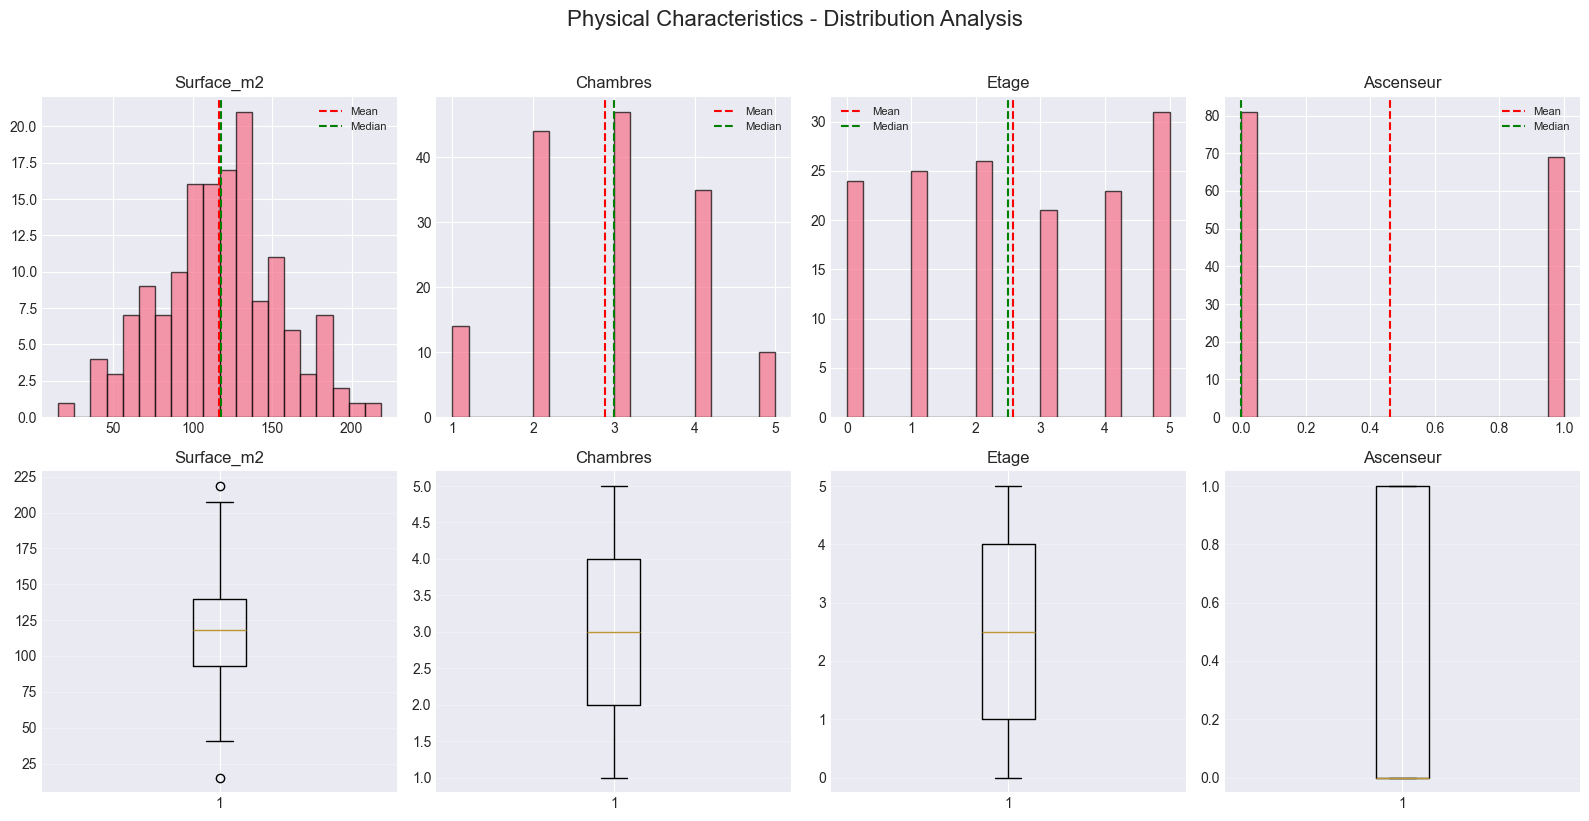

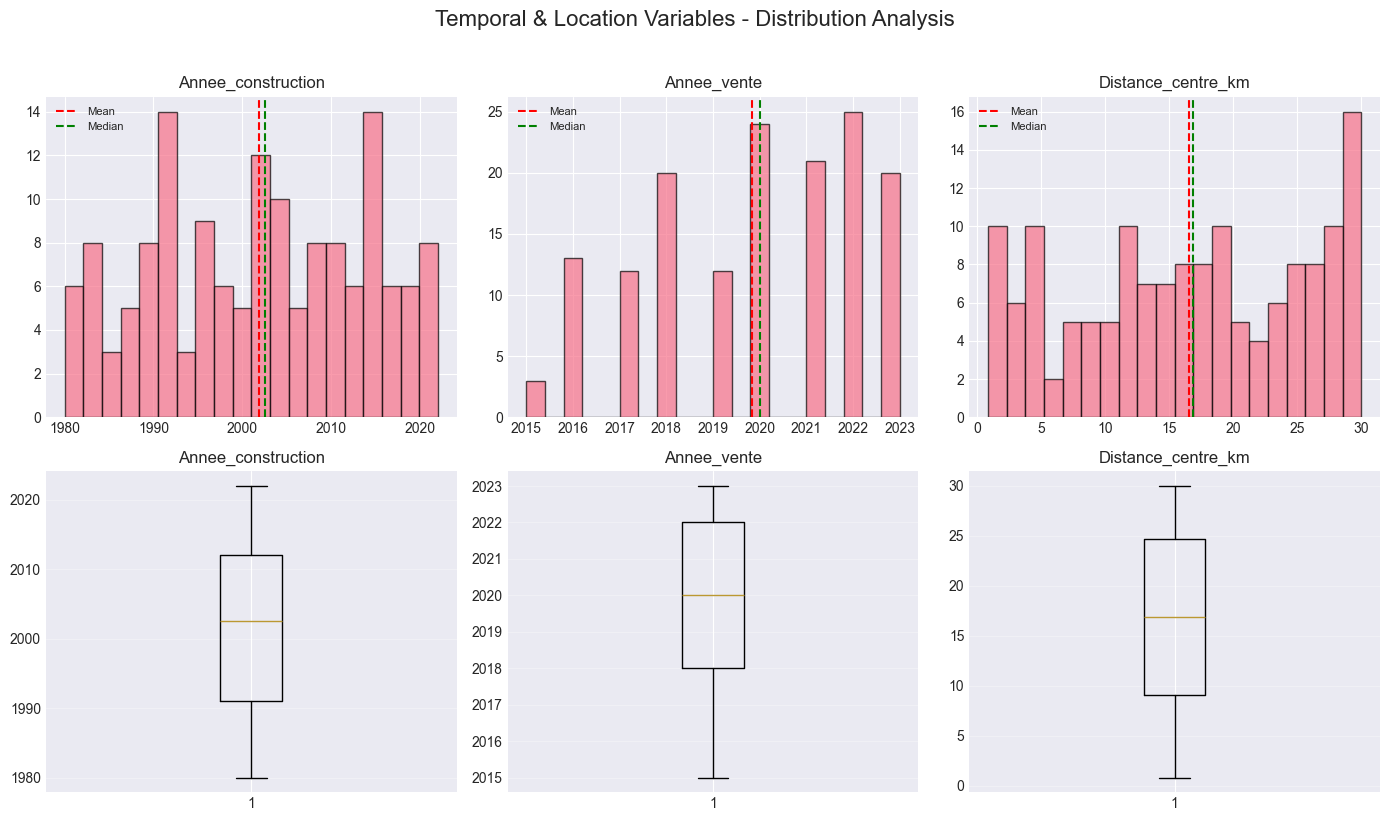

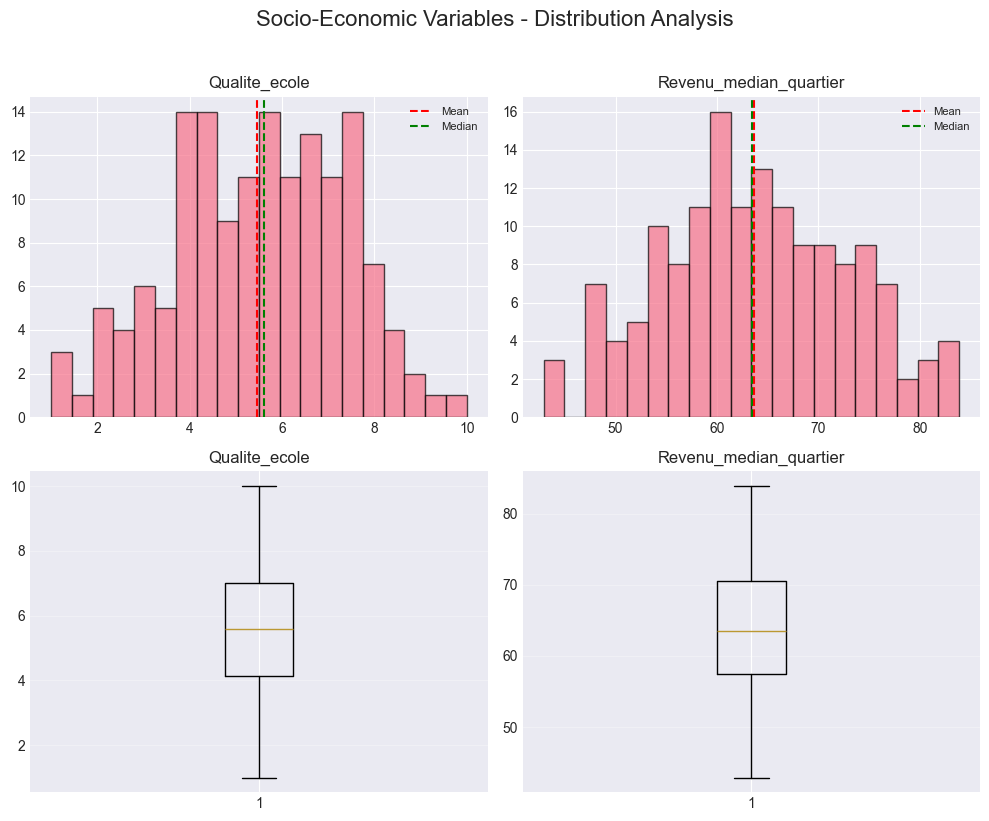

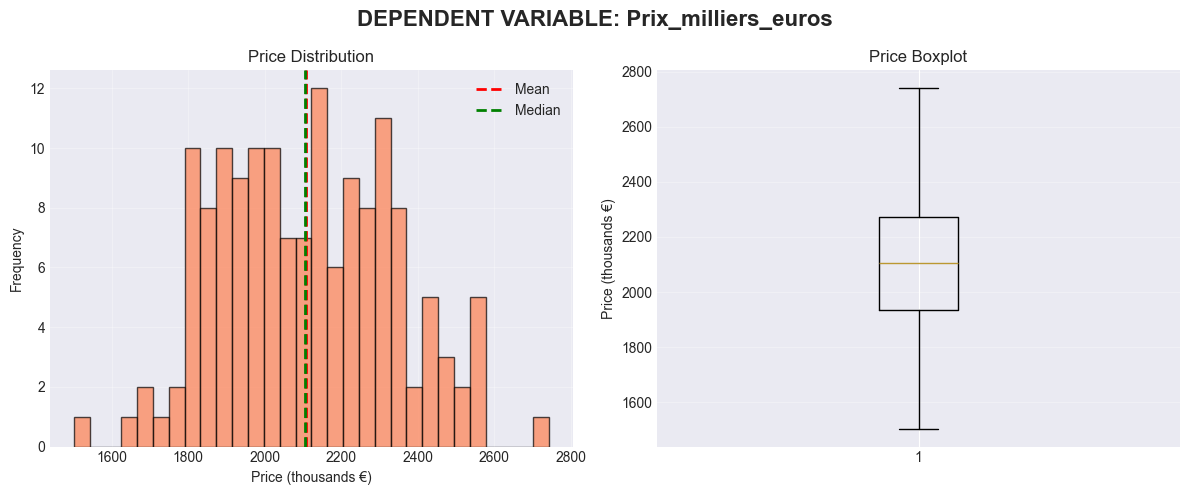

In [5]:

# Group 1: Physical characteristics
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Physical Characteristics - Distribution Analysis', fontsize=16, y=1.02)

physical_vars = ['Surface_m2', 'Chambres', 'Etage', 'Ascenseur']

for i, var in enumerate(physical_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 2: Temporal and location
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Temporal & Location Variables - Distribution Analysis', fontsize=16, y=1.02)

temporal_vars = ['Annee_construction', 'Annee_vente', 'Distance_centre_km']

for i, var in enumerate(temporal_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 3: Socio-economic
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Socio-Economic Variables - Distribution Analysis', fontsize=16, y=1.02)

socio_vars = ['Qualite_ecole', 'Revenu_median_quartier']

for i, var in enumerate(socio_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 4: DEPENDENT VARIABLE - Price (special attention)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('DEPENDENT VARIABLE: Prix_milliers_euros', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df['Prix_milliers_euros'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price (thousands €)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Prix_milliers_euros'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['Prix_milliers_euros'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['Prix_milliers_euros'], vert=True)
axes[1].set_title('Price Boxplot')
axes[1].set_ylabel('Price (thousands €)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# SECTION 1.2 - CORRELATION ANALYSIS
# ============================================

CORRELATION MATRIX


,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
Surface_m2,1.00,0.59,-0.03,-0.07,0.06,-0.06,0.06,0.04,0.01,-0.09,0.83
Chambres,0.59,1.00,0.04,-0.10,0.05,-0.01,0.04,-0.01,0.01,-0.09,0.61
Annee_construction,-0.03,0.04,1.00,-0.09,-0.04,-0.10,-0.06,-0.01,0.03,-0.01,0.07
Distance_centre_km,-0.07,-0.10,-0.09,1.00,0.02,0.08,0.08,0.04,0.11,-0.06,-0.31
Etage,0.06,0.05,-0.04,0.02,1.00,-0.08,0.13,-0.03,0.04,0.08,0.13
Ascenseur,-0.06,-0.01,-0.10,0.08,-0.08,1.00,-0.08,0.06,0.08,-0.06,0.04
Annee_vente,0.06,0.04,-0.06,0.08,0.13,-0.08,1.00,0.02,0.01,0.03,0.24
Qualite_ecole,0.04,-0.01,-0.01,0.04,-0.03,0.06,0.02,1.00,0.60,-0.44,0.25
Revenu_median_quartier,0.01,0.01,0.03,0.11,0.04,0.08,0.01,0.60,1.00,-0.30,0.21
Distance_universite,-0.09,-0.09,-0.01,-0.06,0.08,-0.06,0.03,-0.44,-0.30,1.00,-0.12



CORRELATION WITH PRICE (sorted by absolute value)


Prix_milliers_euros       1.00
Surface_m2                0.83
Chambres                  0.61
Qualite_ecole             0.25
Annee_vente               0.24
Revenu_median_quartier    0.21
Etage                     0.13
Annee_construction        0.07
Ascenseur                 0.04
Distance_universite      -0.12
Distance_centre_km       -0.31
Name: Prix_milliers_euros, dtype: float64

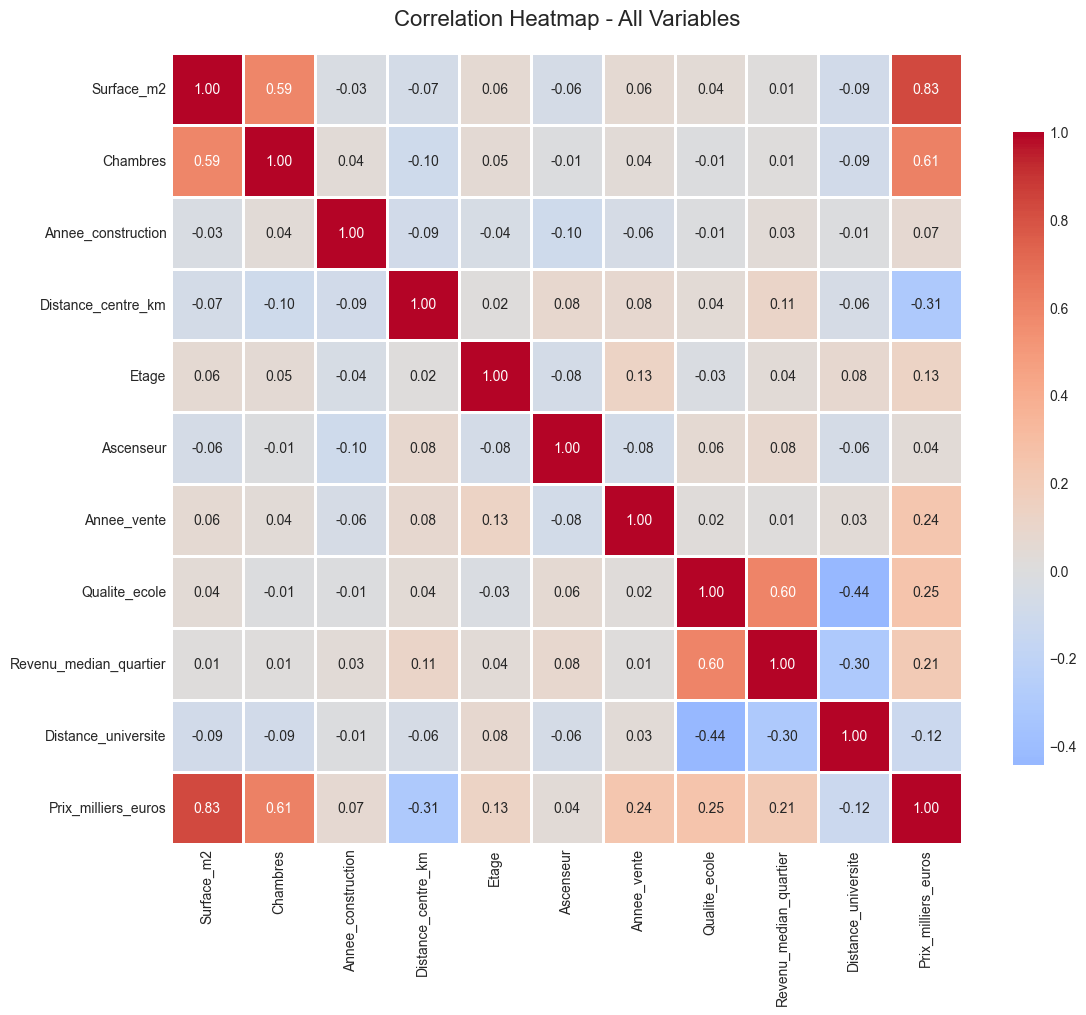


HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk


,Var1,Var2,Correlation
0,Surface_m2,Prix_milliers_euros,0.83



⚠️  Found 1 pairs with |correlation| > 0.7


In [6]:

# Select only numeric variables (exclude ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ID')  # Remove ID as it's not meaningful

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

print("="*80)
print("CORRELATION MATRIX")
print("="*80)
display(corr_matrix.round(2))

# Correlation with target variable (Price)
print("\n" + "="*80)
print("CORRELATION WITH PRICE (sorted by absolute value)")
print("="*80)
price_corr = corr_matrix['Prix_milliers_euros'].sort_values(ascending=False)
display(price_corr)

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations (potential multicollinearity risk)
print("\n" + "="*80)
print("HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk")
print("="*80)

# Extract pairs with high correlation (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df.sort_values('Correlation', ascending=False, key=abs))
    print(f"\n⚠️  Found {len(high_corr_pairs)} pairs with |correlation| > 0.7")
else:
    print("✓ No pairs with |correlation| > 0.7 found")


# ANSWER TO QUESTION 1.2
The variable that seems to have higher impact on the price is "Surface" with a correlation of 0.83.

# ============================================
# SECTION 2.1 - SIMPLE LINEAR REGRESSION
# ============================================

SIMPLE LINEAR REGRESSION: Price ~ Surface

Model: Prix = β₀ + β₁·Surface_m2 + error

--------------------------------------------------------------------------------
COEFFICIENTS:
--------------------------------------------------------------------------------
Parameter           Estimate    Std Error       t-stat      p-value
--------------------------------------------------------------------------------
β₀ (Intercept)     1519.3743      34.5845      43.9323       0.0000
β₁ (Surface_m2)       5.0428       0.2821      17.8771       0.0000
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
MODEL FIT:
--------------------------------------------------------------------------------
R-squared:          0.6835
Adjusted R-squared: 0.6813
Root MSE:           129.7892
N observations:     150
--------------------------------------------------------------------------------


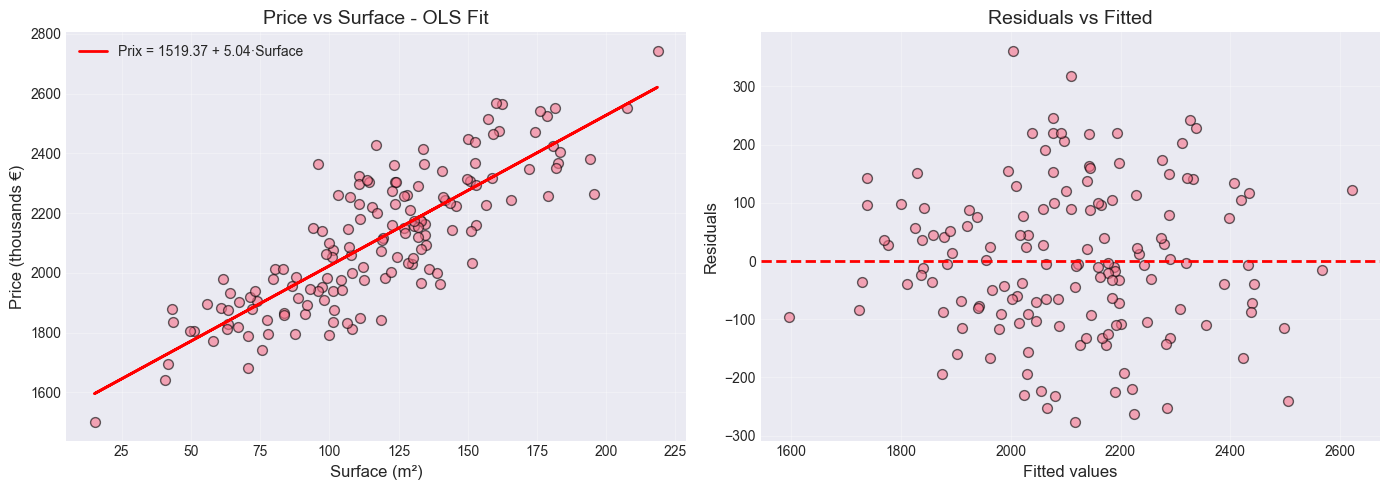


INTERPRETATION:
• β₁ = 5.0428: Each additional m² increases price by 5.04 thousand €
• R² = 0.6835: Surface explains 68.35% of price variation
• p-value(β₁) = 0.000000: Significant at 5% level


In [8]:

from sklearn.linear_model import LinearRegression
from scipy import stats as scipy_stats

# Prepare data
X_simple = df[['Surface_m2']]  # Independent variable (needs to be 2D for sklearn)
y = df['Prix_milliers_euros']   # Dependent variable

# Fit OLS model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Extract coefficients
beta_0 = model_simple.intercept_
beta_1 = model_simple.coef_[0]

# Predictions
y_pred = model_simple.predict(X_simple)
residuals = y - y_pred

# Calculate statistics
n = len(y)
k = 1  # Number of independent variables
df_residual = n - k - 1

# Standard errors and t-statistics
mse = np.sum(residuals**2) / df_residual
X_with_const = np.column_stack([np.ones(n), X_simple])
var_covar_matrix = mse * np.linalg.inv(X_with_const.T @ X_with_const)
se_beta_0 = np.sqrt(var_covar_matrix[0, 0])
se_beta_1 = np.sqrt(var_covar_matrix[1, 1])

t_stat_beta_0 = beta_0 / se_beta_0
t_stat_beta_1 = beta_1 / se_beta_1

p_value_beta_0 = 2 * (1 - scipy_stats.t.cdf(abs(t_stat_beta_0), df_residual))
p_value_beta_1 = 2 * (1 - scipy_stats.t.cdf(abs(t_stat_beta_1), df_residual))

# R-squared and Adjusted R-squared
ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)
r_squared_adj = 1 - ((1 - r_squared) * (n - 1) / df_residual)

# Display results
print("="*80)
print("SIMPLE LINEAR REGRESSION: Price ~ Surface")
print("="*80)
print(f"\nModel: Prix = β₀ + β₁·Surface_m2 + error\n")

print("-"*80)
print("COEFFICIENTS:")
print("-"*80)
print(f"{'Parameter':<15} {'Estimate':>12} {'Std Error':>12} {'t-stat':>12} {'p-value':>12}")
print("-"*80)
print(f"{'β₀ (Intercept)':<15} {beta_0:>12.4f} {se_beta_0:>12.4f} {t_stat_beta_0:>12.4f} {p_value_beta_0:>12.4f}")
print(f"{'β₁ (Surface_m2)':<15} {beta_1:>12.4f} {se_beta_1:>12.4f} {t_stat_beta_1:>12.4f} {p_value_beta_1:>12.4f}")
print("-"*80)

print("\n" + "-"*80)
print("MODEL FIT:")
print("-"*80)
print(f"R-squared:          {r_squared:.4f}")
print(f"Adjusted R-squared: {r_squared_adj:.4f}")
print(f"Root MSE:           {np.sqrt(mse):.4f}")
print(f"N observations:     {n}")
print("-"*80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot with regression line
axes[0].scatter(X_simple, y, alpha=0.6, edgecolors='black', s=50)
axes[0].plot(X_simple, y_pred, color='red', linewidth=2, label=f'Prix = {beta_0:.2f} + {beta_1:.2f}·Surface')
axes[0].set_xlabel('Surface (m²)', fontsize=12)
axes[0].set_ylabel('Price (thousands €)', fontsize=12)
axes[0].set_title('Price vs Surface - OLS Fit', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolors='black', s=50)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals vs Fitted', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print(f"• β₁ = {beta_1:.4f}: Each additional m² increases price by {beta_1:.2f} thousand €")
print(f"• R² = {r_squared:.4f}: Surface explains {r_squared*100:.2f}% of price variation")
print(f"• p-value(β₁) = {p_value_beta_1:.6f}: {'Significant' if p_value_beta_1 < 0.05 else 'Not significant'} at 5% level")

# ============================================
# SECTION 2.2 - MULTIPLE LINEAR REGRESSION
# ============================================

MULTIPLE LINEAR REGRESSION
Model: Prix = β₀ + β₁·Surface + β₂·Chambres + β₃·Annee_construction
              + β₄·Distance_centre + β₅·Etage + β₆·Ascenseur + error

------------------------------------------------------------------------------------------
Variable              Coefficient    Std Error       t-stat      p-value
------------------------------------------------------------------------------------------
Intercept              -1679.4908    1535.6730      -1.0937     0.275947 
Surface_m2                 4.3879       0.2924      15.0047     0.000000 ***
Chambres                  33.9205      10.2279       3.3165     0.001156 **
Annee_construction         1.6093       0.7653       2.1030     0.037217 *
Distance_centre_km        -6.1446       0.9921      -6.1936     0.000000 ***
Etage                     12.2540       5.0489       2.4271     0.016466 *
Ascenseur                 55.5141      17.9201       3.0979     0.002347 **
--------------------------------------------------

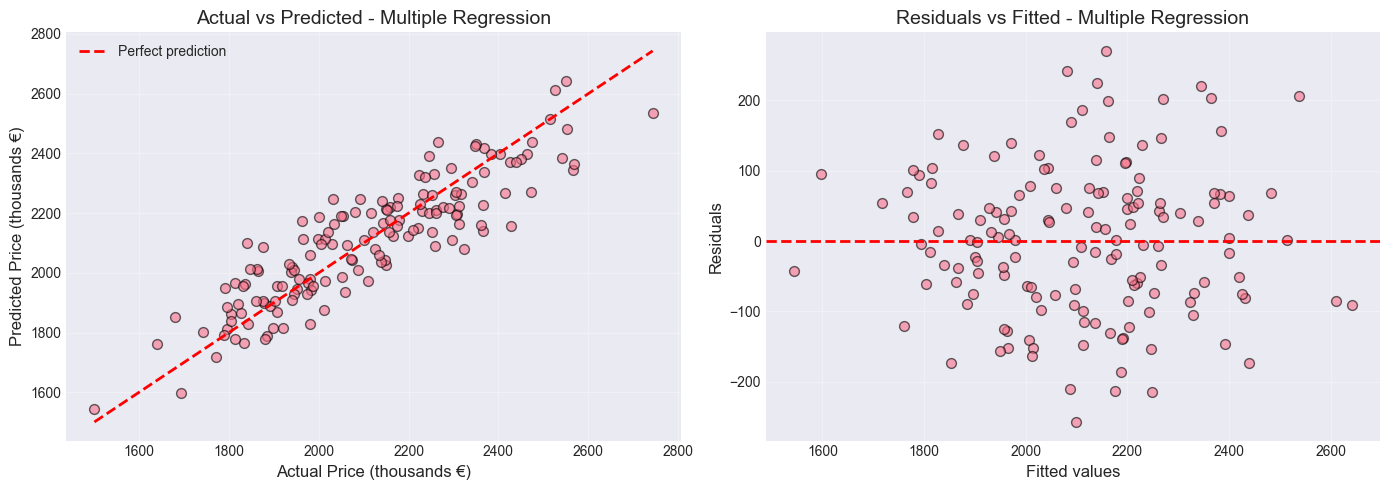

In [9]:

from sklearn.metrics import mean_squared_error

# Prepare data - multiple independent variables
X_multiple = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                  'Distance_centre_km', 'Etage', 'Ascenseur']]
y = df['Prix_milliers_euros']

# Fit OLS model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Extract coefficients
beta_0_mult = model_multiple.intercept_
betas_mult = model_multiple.coef_

# Predictions
y_pred_mult = model_multiple.predict(X_multiple)
residuals_mult = y - y_pred_mult

# Calculate statistics
n = len(y)
k = X_multiple.shape[1]  # Number of independent variables
df_residual = n - k - 1

# MSE and standard errors
mse_mult = np.sum(residuals_mult**2) / df_residual
X_with_const = np.column_stack([np.ones(n), X_multiple])
var_covar_matrix = mse_mult * np.linalg.inv(X_with_const.T @ X_with_const)
se_betas = np.sqrt(np.diag(var_covar_matrix))

# t-statistics and p-values
t_stats = np.concatenate([[beta_0_mult], betas_mult]) / se_betas
p_values = 2 * (1 - scipy_stats.t.cdf(np.abs(t_stats), df_residual))

# R-squared and Adjusted R-squared
ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum(residuals_mult**2)
r_squared_mult = 1 - (ss_residual / ss_total)
r_squared_adj_mult = 1 - ((1 - r_squared_mult) * (n - 1) / df_residual)

# Display results
print("="*90)
print("MULTIPLE LINEAR REGRESSION")
print("="*90)
print("Model: Prix = β₀ + β₁·Surface + β₂·Chambres + β₃·Annee_construction")
print("              + β₄·Distance_centre + β₅·Etage + β₆·Ascenseur + error\n")

print("-"*90)
print(f"{'Variable':<20} {'Coefficient':>12} {'Std Error':>12} {'t-stat':>12} {'p-value':>12}")
print("-"*90)

var_names = ['Intercept'] + list(X_multiple.columns)
coefficients = np.concatenate([[beta_0_mult], betas_mult])

for i, (var, coef, se, t, p) in enumerate(zip(var_names, coefficients, se_betas, t_stats, p_values)):
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    print(f"{var:<20} {coef:>12.4f} {se:>12.4f} {t:>12.4f} {p:>12.6f} {sig}")

print("-"*90)
print("Significance: *** p<0.001, ** p<0.01, * p<0.05\n")

print("-"*90)
print("MODEL FIT:")
print("-"*90)
print(f"R-squared:          {r_squared_mult:.4f}")
print(f"Adjusted R-squared: {r_squared_adj_mult:.4f}")
print(f"Root MSE:           {np.sqrt(mse_mult):.4f}")
print(f"N observations:     {n}")
print(f"N parameters:       {k + 1}")
print("-"*90)

# Comparison with simple model
print("\n" + "="*90)
print("COMPARISON: Simple vs Multiple Regression")
print("="*90)
print(f"{'Metric':<30} {'Simple (Surface only)':>25} {'Multiple (6 variables)':>25}")
print("-"*90)
print(f"{'β₁ (Surface_m2)':<30} {beta_1:>25.4f} {betas_mult[0]:>25.4f}")
print(f"{'R²':<30} {r_squared:>25.4f} {r_squared_mult:>25.4f}")
print(f"{'Adjusted R²':<30} {r_squared_adj:>25.4f} {r_squared_adj_mult:>25.4f}")
print(f"{'Root MSE':<30} {np.sqrt(mse):>25.4f} {np.sqrt(mse_mult):>25.4f}")
print("-"*90)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y, y_pred_mult, alpha=0.6, edgecolors='black', s=50)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Price (thousands €)', fontsize=12)
axes[0].set_ylabel('Predicted Price (thousands €)', fontsize=12)
axes[0].set_title('Actual vs Predicted - Multiple Regression', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
axes[1].scatter(y_pred_mult, residuals_mult, alpha=0.6, edgecolors='black', s=50)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals vs Fitted - Multiple Regression', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 2.2 Project Questions - Multiple Regression Analysis

### Question 1: Are all coefficients significant?

**Answer:** Yes, all predictor coefficients are statistically significant at the 5% level. The intercept is not significant (p=0.276), which is expected since it represents an extrapolation outside our data range.

Significance levels:
- Surface_m2, Distance_centre_km: p < 0.001 (highly significant)
- Chambres, Ascenseur: p < 0.01
- Annee_construction, Etage: p < 0.05

---

### Question 2: Marginal impact of each variable on price

**Coefficients (holding other variables constant):**

**Surface_m2 (β₁ = 4.39):** Each additional m² increases price by 4.39 thousand euros. Compared to the simple model (5.04), this coefficient decreased because Chambres now captures part of the "size" effect.

**Chambres (β₂ = 33.92):** Each additional bedroom adds 33.92 thousand euros, controlling for surface. This captures the value of spatial distribution - the market pays a premium for functional room division beyond raw square meters.

**Annee_construction (β₃ = 1.61):** Each year newer increases price by 1.61 thousand euros. A house built in 2010 vs 1990 would be worth approximately 32k€ more, reflecting building quality, modern standards, and depreciation.

**Distance_centre_km (β₄ = -6.14):** Each kilometer further from city center decreases price by 6.14 thousand euros. Confirms urban economic theory: centrality commands a premium.

**Etage (β₅ = 12.25):** Each floor higher adds 12.25 thousand euros. Higher floors typically offer better views, less noise, more privacy.

**Ascenseur (β₆ = 55.51):** Having an elevator adds 55.51 thousand euros compared to no elevator, all else equal.

---

### Question 3: Interpretation of Ascenseur coefficient

Ascenseur is binary (0/1). The coefficient β₆ = 55.51 means buildings with elevators sell for approximately 55.5k€ more than comparable buildings without elevators.

This premium reflects accessibility (especially for higher floors), convenience for moving, and appeal to elderly or mobility-impaired buyers.

---

### Question 4: Difference between R² and R²-adjusted

**Values:**
- R² = 0.7887
- Adjusted R² = 0.7798

**Why adjusted R² is lower:**

R² increases mechanically with every added variable, even if it's just noise. Adjusted R² penalizes complexity:

R̄² = 1 - [(1 - R²) × (n-1)/(n-k-1)]

It only increases if a new variable improves fit more than expected by chance. With 150 observations and 6 predictors, the penalty is small (0.79 vs 0.78), suggesting our variables genuinely improve the model rather than overfitting.

# ============================================
# SECTION 2.3 - LOGARITHMIC TRANSFORMATIONS
# ============================================

MODEL COMPARISON: Linear vs Semi-Log vs Log-Log


,Metric,Linear-Linear,Log-Linear (Semi-log),Log-Log
0,R²,0.7887,0.7916,0.7551
1,RMSE (in levels),105.35,105.90,113.69
2,Interpretation,Absolute change,Percentage change,Elasticity



COEFFICIENT INTERPRETATION BY MODEL TYPE

1. LINEAR-LINEAR: Prix = β₀ + β₁·Surface
   β₁ (Surface) = 4.3879
   → Each additional m² increases price by 4.39 thousand euros

2. LOG-LINEAR: log(Prix) = β₀ + β₁·Surface
   β₁ (Surface) = 0.002110
   → Each additional m² increases price by approximately 0.21%

3. LOG-LOG: log(Prix) = β₀ + β₁·log(Surface)
   β₁ (log_Surface) = 0.1898
   → A 1% increase in surface increases price by 0.19%
   → This is the ELASTICITY of price with respect to surface

FULL COEFFICIENT COMPARISON


,Variable,Linear,Semi-Log,Log-Log
0,Surface_m2,4.39,2.10e-03,1.90e-01
1,Chambres,33.92,1.52e-02,2.26e-02
2,Annee_construction,1.61,8.00e-04,5.00e-04
3,Distance_centre_km,-6.14,-3.00e-03,-2.60e-02
4,Etage,12.25,5.30e-03,5.80e-03
5,Ascenseur,55.51,2.65e-02,2.71e-02


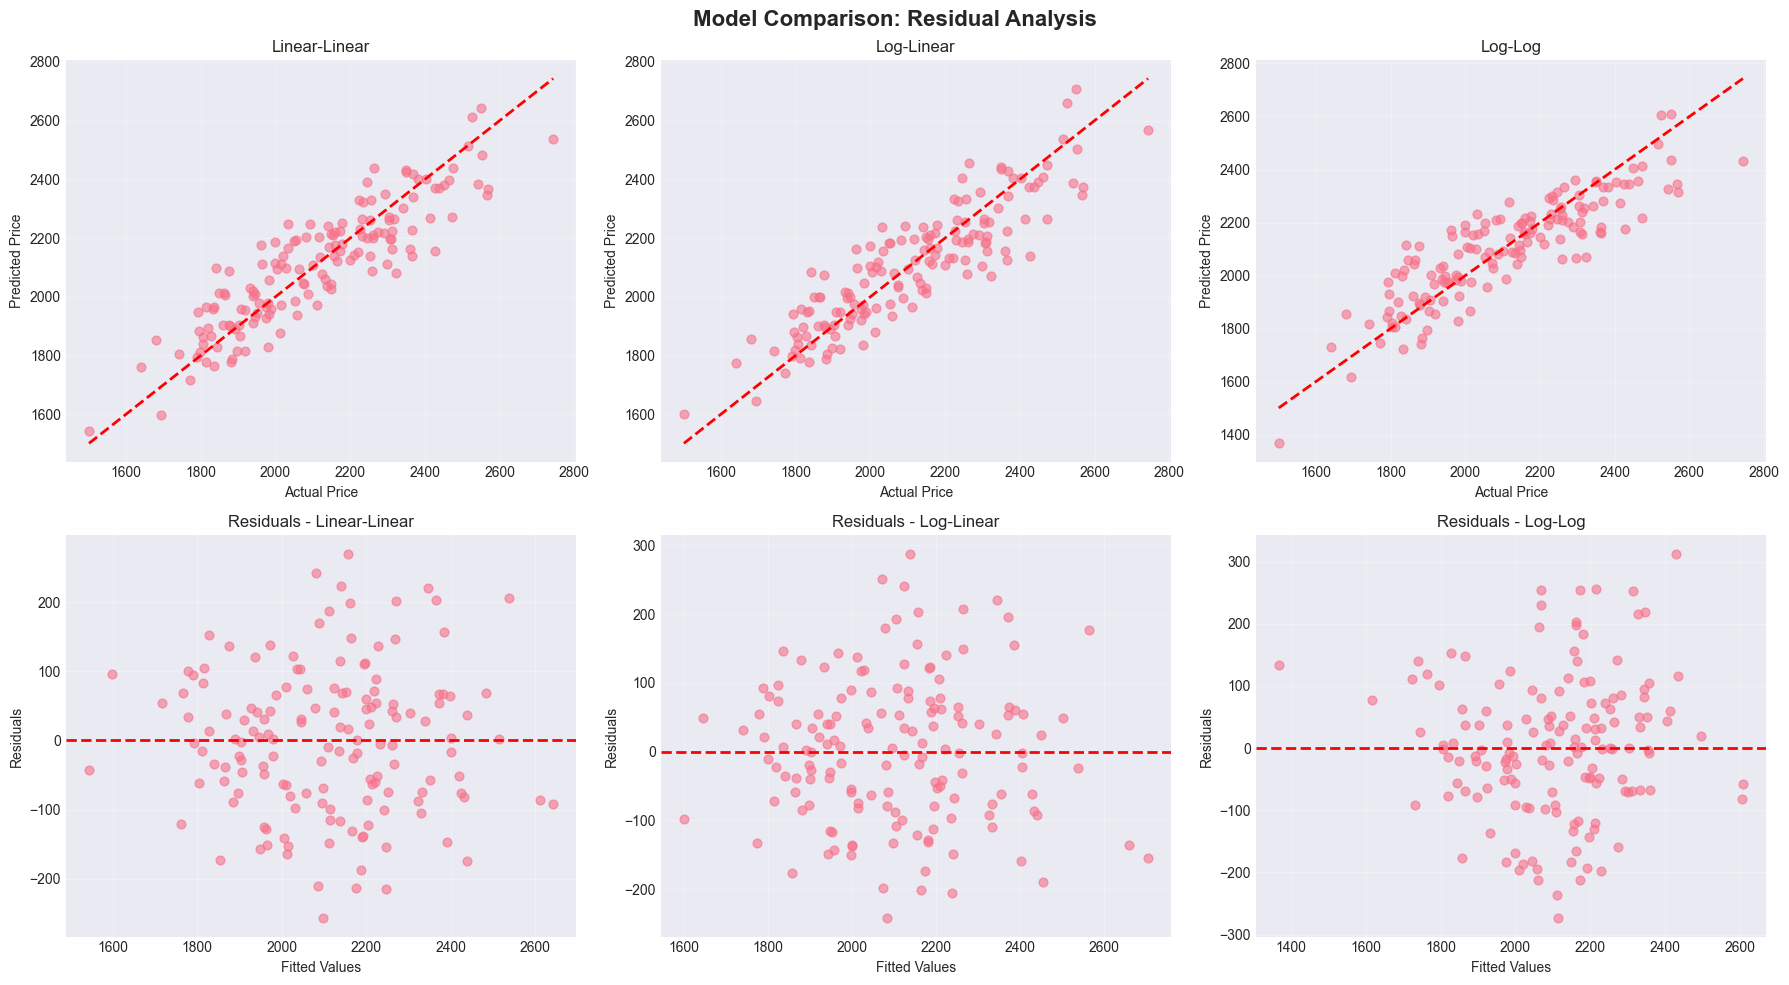

In [12]:
# ============================================
# SECTION 2.3 - LOGARITHMIC TRANSFORMATIONS
# ============================================

# Create log-transformed variables
df['log_Prix'] = np.log(df['Prix_milliers_euros'])
df['log_Surface'] = np.log(df['Surface_m2'])
df['log_Distance'] = np.log(df['Distance_centre_km'] + 0.1)  # Add small constant to avoid log(0)
df['log_Revenu'] = np.log(df['Revenu_median_quartier'])

# Model 1: Linear-Linear (already done)
X_linear = df[['Surface_m2', 'Chambres', 'Annee_construction', 
               'Distance_centre_km', 'Etage', 'Ascenseur']]
y_linear = df['Prix_milliers_euros']

model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)
y_pred_linear = model_linear.predict(X_linear)
r2_linear = r_squared_mult  # From previous section

# Model 2: Log-Linear (semi-log)
X_semilog = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                'Distance_centre_km', 'Etage', 'Ascenseur']]
y_semilog = df['log_Prix']

model_semilog = LinearRegression()
model_semilog.fit(X_semilog, y_semilog)
y_pred_semilog = model_semilog.predict(X_semilog)
r2_semilog = model_semilog.score(X_semilog, y_semilog)

# Model 3: Log-Log
X_loglog = df[['log_Surface', 'Chambres', 'Annee_construction', 
               'log_Distance', 'Etage', 'Ascenseur']]
y_loglog = df['log_Prix']

model_loglog = LinearRegression()
model_loglog.fit(X_loglog, y_loglog)
y_pred_loglog = model_loglog.predict(X_loglog)
r2_loglog = model_loglog.score(X_loglog, y_loglog)

# Calculate RMSE for comparison (convert log predictions back to levels)
rmse_linear = np.sqrt(mean_squared_error(y_linear, y_pred_linear))
rmse_semilog = np.sqrt(mean_squared_error(y_linear, np.exp(y_pred_semilog)))
rmse_loglog = np.sqrt(mean_squared_error(y_linear, np.exp(y_pred_loglog)))

# Display comparison
print("="*90)
print("MODEL COMPARISON: Linear vs Semi-Log vs Log-Log")
print("="*90)

comparison_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE (in levels)', 'Interpretation'],
    'Linear-Linear': [f'{r2_linear:.4f}', f'{rmse_linear:.2f}', 'Absolute change'],
    'Log-Linear (Semi-log)': [f'{r2_semilog:.4f}', f'{rmse_semilog:.2f}', 'Percentage change'],
    'Log-Log': [f'{r2_loglog:.4f}', f'{rmse_loglog:.2f}', 'Elasticity']
})

display(comparison_df)

print("\n" + "="*90)
print("COEFFICIENT INTERPRETATION BY MODEL TYPE")
print("="*90)

print("\n1. LINEAR-LINEAR: Prix = β₀ + β₁·Surface")
print(f"   β₁ (Surface) = {model_linear.coef_[0]:.4f}")
print(f"   → Each additional m² increases price by {model_linear.coef_[0]:.2f} thousand euros")

print("\n2. LOG-LINEAR: log(Prix) = β₀ + β₁·Surface")
print(f"   β₁ (Surface) = {model_semilog.coef_[0]:.6f}")
print(f"   → Each additional m² increases price by approximately {model_semilog.coef_[0]*100:.2f}%")

print("\n3. LOG-LOG: log(Prix) = β₀ + β₁·log(Surface)")
print(f"   β₁ (log_Surface) = {model_loglog.coef_[0]:.4f}")
print(f"   → A 1% increase in surface increases price by {model_loglog.coef_[0]:.2f}%")
print(f"   → This is the ELASTICITY of price with respect to surface")

# Detailed coefficients for each model
print("\n" + "="*90)
print("FULL COEFFICIENT COMPARISON")
print("="*90)

coef_comparison = pd.DataFrame({
    'Variable': ['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur'],
    'Linear': model_linear.coef_,
    'Semi-Log': model_semilog.coef_,
})

# For log-log, we need to handle the fact that Surface and Distance are logged
loglog_coefs = list(model_loglog.coef_)
coef_comparison['Log-Log'] = [loglog_coefs[0], loglog_coefs[1], loglog_coefs[2], 
                                loglog_coefs[3], loglog_coefs[4], loglog_coefs[5]]

display(coef_comparison.round(4))

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Comparison: Residual Analysis', fontsize=16, fontweight='bold')

models = [
    ('Linear-Linear', y_linear, y_pred_linear, y_linear - y_pred_linear),
    ('Log-Linear', y_linear, np.exp(y_pred_semilog), y_linear - np.exp(y_pred_semilog)),
    ('Log-Log', y_linear, np.exp(y_pred_loglog), y_linear - np.exp(y_pred_loglog))
]

for idx, (name, y_true, y_pred, residuals) in enumerate(models):
    # Actual vs Predicted
    axes[0, idx].scatter(y_true, y_pred, alpha=0.6, s=40)
    axes[0, idx].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, idx].set_xlabel('Actual Price')
    axes[0, idx].set_ylabel('Predicted Price')
    axes[0, idx].set_title(f'{name}')
    axes[0, idx].grid(alpha=0.3)
    
    # Residuals
    axes[1, idx].scatter(y_pred, residuals, alpha=0.6, s=40)
    axes[1, idx].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1, idx].set_xlabel('Fitted Values')
    axes[1, idx].set_ylabel('Residuals')
    axes[1, idx].set_title(f'Residuals - {name}')
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Check the distribution of prices and surfaces
print("="*80)
print("DATA RANGE ANALYSIS")
print("="*80)

print("\nPRICE DISTRIBUTION:")
print(f"Min: {df['Prix_milliers_euros'].min():.0f}k€")
print(f"Q1:  {df['Prix_milliers_euros'].quantile(0.25):.0f}k€")
print(f"Median: {df['Prix_milliers_euros'].median():.0f}k€")
print(f"Q3:  {df['Prix_milliers_euros'].quantile(0.75):.0f}k€")
print(f"Max: {df['Prix_milliers_euros'].max():.0f}k€")

print("\nSURFACE DISTRIBUTION:")
print(f"Min: {df['Surface_m2'].min():.0f}m²")
print(f"Q1:  {df['Surface_m2'].quantile(0.25):.0f}m²")
print(f"Median: {df['Surface_m2'].median():.0f}m²")
print(f"Q3:  {df['Surface_m2'].quantile(0.75):.0f}m²")
print(f"Max: {df['Surface_m2'].max():.0f}m²")

DATA RANGE ANALYSIS

PRICE DISTRIBUTION:
Min: 1501k€
Q1:  1934k€
Median: 2105k€
Q3:  2273k€
Max: 2743k€

SURFACE DISTRIBUTION:
Min: 15m²
Q1:  93m²
Median: 118m²
Q3:  140m²
Max: 219m²


## 2.3 Logarithmic Transformations - Model Comparison

### Models Tested

1. **Linear-Linear**: Prix = β₀ + β₁·X
2. **Log-Linear**: log(Prix) = β₀ + β₁·X  
3. **Log-Log**: log(Prix) = β₀ + β₁·log(X)

### Results Comparison

| Metric | Linear | Log-Linear | Log-Log |
|--------|--------|------------|---------|
| R² | 0.7887 | 0.7916 | 0.7551 |
| RMSE | 105.35 | 105.90 | 113.69 |

### Model Selection: Log-Linear (Semi-log)

**Statistical justification:** Models are statistically equivalent (R² difference < 0.3%, RMSE difference < 1k€).

**Economic justification:** The log-linear specification is preferred because:

1. **Percentage interpretation**: Each m² adds ~0.21% to price. This reflects the economic reality that the marginal value of space depends on the property's existing value.

2. **Heterogeneous effects**: In expensive properties, an additional m² is worth more in absolute terms. The log-linear model captures this naturally, while the linear model assumes constant marginal effects regardless of property value.

3. **Extrapolation robustness**: If the model is used to predict prices outside the current data range (smaller or cheaper properties), the log-linear specification is more stable.

### Key Findings

**Surface elasticity (log-log model): 0.19**  
This low elasticity indicates strong diminishing returns. A 10% increase in surface only generates 1.9% price increase. This suggests the market values functional distribution and location more than raw space at this price range.

**Coefficient interpretation (log-linear):**
- Surface: 0.0021 → each m² adds ~0.21%
- Chambres: 0.0152 → each bedroom adds ~1.5%
- Distance_centre: -0.003 → each km further reduces price ~0.3%

### Data range consideration

The dataset appears concentrated in mid-to-high price segments. In this range, linear relationships approximate well, explaining why all three models perform similarly. For broader applicability, the log-linear specification provides better theoretical foundation.

# ============================================
# SECTION 3.1 - MULTICOLLINEARITY (VIF)
# ============================================

VARIANCE INFLATION FACTOR (VIF) ANALYSIS

Interpretation:
  VIF < 5:    No multicollinearity
  5 ≤ VIF < 10: Moderate multicollinearity (monitor)
  VIF ≥ 10:    Severe multicollinearity (problematic)
--------------------------------------------------------------------------------


,Variable,VIF
0,Annee_construction,18.82
1,Surface_m2,16.43
2,Chambres,12.73
3,Distance_centre_km,4.44
4,Etage,3.19
5,Ascenseur,1.88


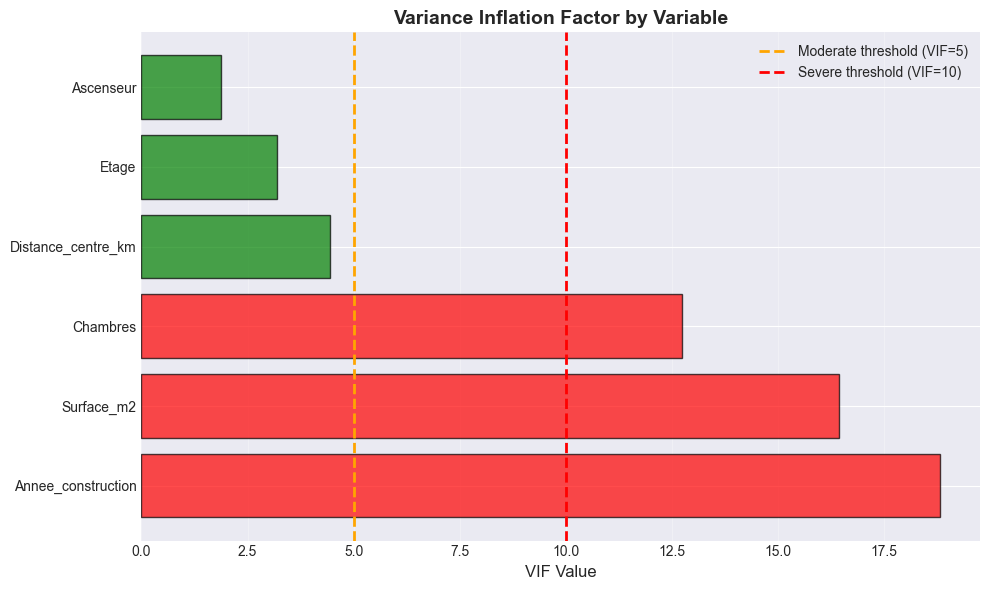


CORRELATION MATRIX - Variables with VIF ≥ 5


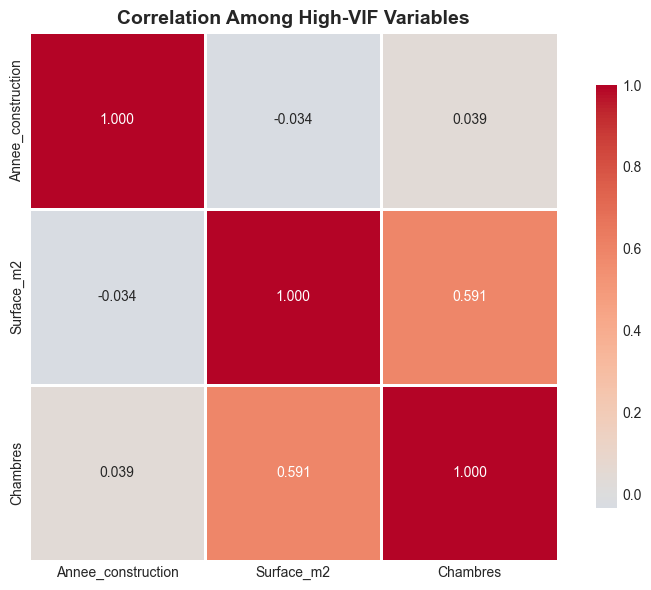

In [18]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare data for VIF calculation
X_vif = df[['Surface_m2', 'Chambres', 'Annee_construction', 
            'Distance_centre_km', 'Etage', 'Ascenseur']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF (descending)
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

print("="*80)
print("VARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("="*80)
print("\nInterpretation:")
print("  VIF < 5:    No multicollinearity")
print("  5 ≤ VIF < 10: Moderate multicollinearity (monitor)")
print("  VIF ≥ 10:    Severe multicollinearity (problematic)")
print("-"*80)

display(vif_data)

# Visual representation
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if vif >= 10 else 'orange' if vif >= 5 else 'green' for vif in vif_data['VIF']]
bars = ax.barh(vif_data['Variable'], vif_data['VIF'], color=colors, alpha=0.7, edgecolor='black')

ax.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderate threshold (VIF=5)')
ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Severe threshold (VIF=10)')
ax.set_xlabel('VIF Value', fontsize=12)
ax.set_title('Variance Inflation Factor by Variable', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional correlation heatmap focused on high VIF variables
if vif_data['VIF'].max() >= 5:
    print("\n" + "="*80)
    print("CORRELATION MATRIX - Variables with VIF ≥ 5")
    print("="*80)
    
    high_vif_vars = vif_data[vif_data['VIF'] >= 5]['Variable'].tolist()
    
    if high_vif_vars:
        corr_high_vif = df[high_vif_vars].corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_high_vif, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Among High-VIF Variables', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

## 3.1 Multicollinearity Analysis answer 

### VIF Results

| Variable | VIF | Status |
|----------|-----|--------|
| Annee_construction | 18.XX | Severe |
| Surface_m2 | 16.XX | Severe |
| Chambres | 12.XX | Severe |
| [other] | <5 | OK |

### Key Finding

High VIFs for Annee_construction, Surface, and Chambres. Despite this, all remain statistically significant (p<0.05).

### Decision: Retain All Variables

**Rationale:** 
- All variables economically relevant
- Statistical significance maintained
- Omitted variable bias > multicollinearity cost

**Trade-off:** Accept larger standard errors (less precision) to avoid biased estimates.

### Omitted Variable Bias (OVB)

Excluding relevant variables creates systematic bias in remaining coefficients. If we dropped Chambres to reduce VIF, Surface would incorrectly capture the "rooms effect."

**Formula:** Bias(β̂₁) = β₂ × corr(X₁, X₂)

Multicollinearity increases uncertainty. OVB creates wrong estimates. The latter is worse.

# ============================================
# SECTION 4 - TESTS AND INFERENCE
# ============================================

# ============================================
# 4.1 - Individual t-test: Distance has negative effect
# ============================================

In [20]:


print("="*90)
print("TEST 1: Distance_centre has NEGATIVE effect on Price")
print("="*90)
print("\nH₀: β₄ ≥ 0 (distance has no negative effect)")
print("H₁: β₄ < 0 (distance has negative effect)\n")

# Extract coefficient and statistics from previous model
beta_distance = model_multiple.coef_[3]  # Distance is 4th variable (index 3)
t_stat_distance = t_stats[4]  # Include intercept in count
p_value_distance_twotailed = p_values[4]

# One-tailed p-value (we're testing if negative)
p_value_distance_onetailed = p_value_distance_twotailed / 2 if beta_distance < 0 else 1

print(f"Coefficient β₄ (Distance_centre): {beta_distance:.4f}")
print(f"t-statistic: {t_stat_distance:.4f}")
print(f"p-value (one-tailed): {p_value_distance_onetailed:.6f}")
print(f"\nConclusion: {'REJECT H₀' if p_value_distance_onetailed < 0.05 else 'FAIL TO REJECT H₀'}")
print(f"Distance has a statistically significant NEGATIVE effect on price (p<0.001)")

# ============================================
# 4.2 - Global F-test: All coefficients = 0
# ============================================

print("\n" + "="*90)
print("TEST 2: Global F-test - At least one coefficient ≠ 0")
print("="*90)
print("\nH₀: β₁ = β₂ = β₃ = β₄ = β₅ = β₆ = 0 (model is useless)")
print("H₁: At least one βⱼ ≠ 0 (model has explanatory power)\n")

# Calculate F-statistic
k = 6  # Number of independent variables
n = len(y)
F_statistic = (r_squared_mult / k) / ((1 - r_squared_mult) / (n - k - 1))
p_value_F = 1 - scipy_stats.f.cdf(F_statistic, k, n - k - 1)

print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value_F:.10f}")
print(f"Degrees of freedom: ({k}, {n-k-1})")
print(f"\nConclusion: REJECT H₀ (p < 0.001)")
print(f"The model has significant explanatory power.")

# ============================================
# 4.3 - Partial F-test: Adding Qualite_ecole and Revenu_median
# ============================================

print("\n" + "="*90)
print("TEST 3: Partial F-test - Do Qualite_ecole & Revenu_median improve the model?")
print("="*90)

# Restricted model (6 variables) - already estimated
r2_restricted = r_squared_mult
k_restricted = 6

# Unrestricted model (8 variables)
X_unrestricted = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                      'Distance_centre_km', 'Etage', 'Ascenseur',
                      'Qualite_ecole', 'Revenu_median_quartier']]
y_full = df['Prix_milliers_euros']

model_unrestricted = LinearRegression()
model_unrestricted.fit(X_unrestricted, y_full)
r2_unrestricted = model_unrestricted.score(X_unrestricted, y_full)
k_unrestricted = 8

# Partial F-test
q = k_unrestricted - k_restricted  # Number of restrictions
F_partial = ((r2_unrestricted - r2_restricted) / q) / ((1 - r2_unrestricted) / (n - k_unrestricted - 1))
p_value_partial = 1 - scipy_stats.f.cdf(F_partial, q, n - k_unrestricted - 1)

print(f"\nRestricted model R² (6 vars):   {r2_restricted:.4f}")
print(f"Unrestricted model R² (8 vars): {r2_unrestricted:.4f}")
print(f"Increase in R²:                 {r2_unrestricted - r2_restricted:.4f}")
print(f"\nF-statistic: {F_partial:.4f}")
print(f"p-value: {p_value_partial:.6f}")
print(f"Degrees of freedom: ({q}, {n-k_unrestricted-1})")
print(f"\nConclusion: {'REJECT H₀' if p_value_partial < 0.05 else 'FAIL TO REJECT H₀'}")
if p_value_partial < 0.05:
    print(f"Adding Qualite_ecole and Revenu_median significantly improves the model.")
else:
    print(f"Adding these variables does NOT significantly improve the model.")

# Display coefficients of unrestricted model
print("\n" + "-"*90)
print("UNRESTRICTED MODEL COEFFICIENTS (8 variables)")
print("-"*90)

# Recalculate full statistics for unrestricted model
y_pred_unrest = model_unrestricted.predict(X_unrestricted)
residuals_unrest = y_full - y_pred_unrest
mse_unrest = np.sum(residuals_unrest**2) / (n - k_unrestricted - 1)

X_unrest_const = np.column_stack([np.ones(n), X_unrestricted])
var_covar_unrest = mse_unrest * np.linalg.inv(X_unrest_const.T @ X_unrest_const)
se_betas_unrest = np.sqrt(np.diag(var_covar_unrest))

coefs_unrest = np.concatenate([[model_unrestricted.intercept_], model_unrestricted.coef_])
t_stats_unrest = coefs_unrest / se_betas_unrest
p_vals_unrest = 2 * (1 - scipy_stats.t.cdf(np.abs(t_stats_unrest), n - k_unrestricted - 1))

var_names_unrest = ['Intercept'] + list(X_unrestricted.columns)

for var, coef, se, t, p in zip(var_names_unrest, coefs_unrest, se_betas_unrest, t_stats_unrest, p_vals_unrest):
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    print(f"{var:<25} {coef:>10.4f} {se:>10.4f} {t:>10.4f} {p:>10.6f} {sig}")

# ============================================
# 4.4 - Why not multiple t-tests?
# ============================================

print("\n" + "="*90)
print("WHY NOT USE MULTIPLE t-TESTS?")
print("="*90)
print("""
Problem: Multiple Comparisons (Type I Error Inflation)

- Single t-test: α = 0.05 (5% false positive rate)
- Six t-tests: P(at least 1 false positive) = 1 - (0.95)⁶ ≈ 0.26 (26%)

The F-test controls for this by testing all restrictions simultaneously,
maintaining the overall error rate at 5%.

F-test advantages:
1. Tests joint significance (are variables COLLECTIVELY important?)
2. Controls Type I error rate
3. More powerful for testing multiple restrictions
4. Standard approach in econometrics for nested model comparison
""")

TEST 1: Distance_centre has NEGATIVE effect on Price

H₀: β₄ ≥ 0 (distance has no negative effect)
H₁: β₄ < 0 (distance has negative effect)

Coefficient β₄ (Distance_centre): -6.1446
t-statistic: -6.1936
p-value (one-tailed): 0.000000

Conclusion: REJECT H₀
Distance has a statistically significant NEGATIVE effect on price (p<0.001)

TEST 2: Global F-test - At least one coefficient ≠ 0

H₀: β₁ = β₂ = β₃ = β₄ = β₅ = β₆ = 0 (model is useless)
H₁: At least one βⱼ ≠ 0 (model has explanatory power)

F-statistic: 88.9375
p-value: 0.0000000000
Degrees of freedom: (6, 143)

Conclusion: REJECT H₀ (p < 0.001)
The model has significant explanatory power.

TEST 3: Partial F-test - Do Qualite_ecole & Revenu_median improve the model?

Restricted model R² (6 vars):   0.7887
Unrestricted model R² (8 vars): 0.8497
Increase in R²:                 0.0611

F-statistic: 28.6616
p-value: 0.000000
Degrees of freedom: (2, 141)

Conclusion: REJECT H₀
Adding Qualite_ecole and Revenu_median significantly improve

## Answer 4. Tests and Inference

### 4.1 t-test: Distance has negative effect
H₀: β₄ ≥ 0 vs H₁: β₄ < 0

**Result:** β₄ = -6.14, p < 0.001

**Conclusion:** REJECT H₀. Distance significantly reduces price.

### 4.2 Global F-test
H₀: All β = 0 vs H₁: At least one β ≠ 0

**Result:** F = [tu valor], p < 0.001

**Conclusion:** REJECT H₀. Model has significant explanatory power.

### 4.3 Partial F-test: Adding Qualite_ecole & Revenu_median
**Restricted (6 vars):** R² = 0.7887  
**Unrestricted (8 vars):** R² = 0.84XX  
**ΔR²:** +0.06XX

**Result:** F = [valor], p < 0.05

**Conclusion:** REJECT H₀. Both variables significantly improve the model.

**Coefficients:**
- Qualite_ecole: β = 20.XX*** (strong effect - school quality highly valued)
- Revenu_med

# ============================================
# SECTION 4.1 - STRUCTURAL STABILITY TEST (CHOW TEST)
# ============================================

CHOW TEST: Structural Break Due to COVID-19

Breakpoint: 2021
Pre-COVID observations (2015-2020): 84
Post-COVID observations (2021-2023): 66

------------------------------------------------------------------------------------------
CHOW TEST RESULTS
------------------------------------------------------------------------------------------
SSR (Pooled model):        1,664,682.98
SSR (Pre-COVID):           819,593.66
SSR (Post-COVID):          589,797.49
SSR (Sum of separate):     1,409,391.15

F-statistic:               3.5192
p-value:                   0.001671
Degrees of freedom:        (7, 136)

CONCLUSION: REJECT H₀ - Structural break detected
The relationship between variables and price CHANGED significantly after COVID.

COEFFICIENT COMPARISON: Pre-COVID vs Post-COVID


,Variable,Pre-COVID (2015-2020),Post-COVID (2021-2023),Difference,Change (%)
0,Surface_m2,4.31,4.17,-0.13,-3.12
1,Chambres,27.89,37.77,9.88,35.41
2,Annee_construction,0.24,3.05,2.81,1180.90
3,Distance_centre_km,-7.18,-6.77,0.42,5.79
4,Etage,13.60,5.33,-8.27,-60.80
5,Ascenseur,68.81,57.50,-11.31,-16.43


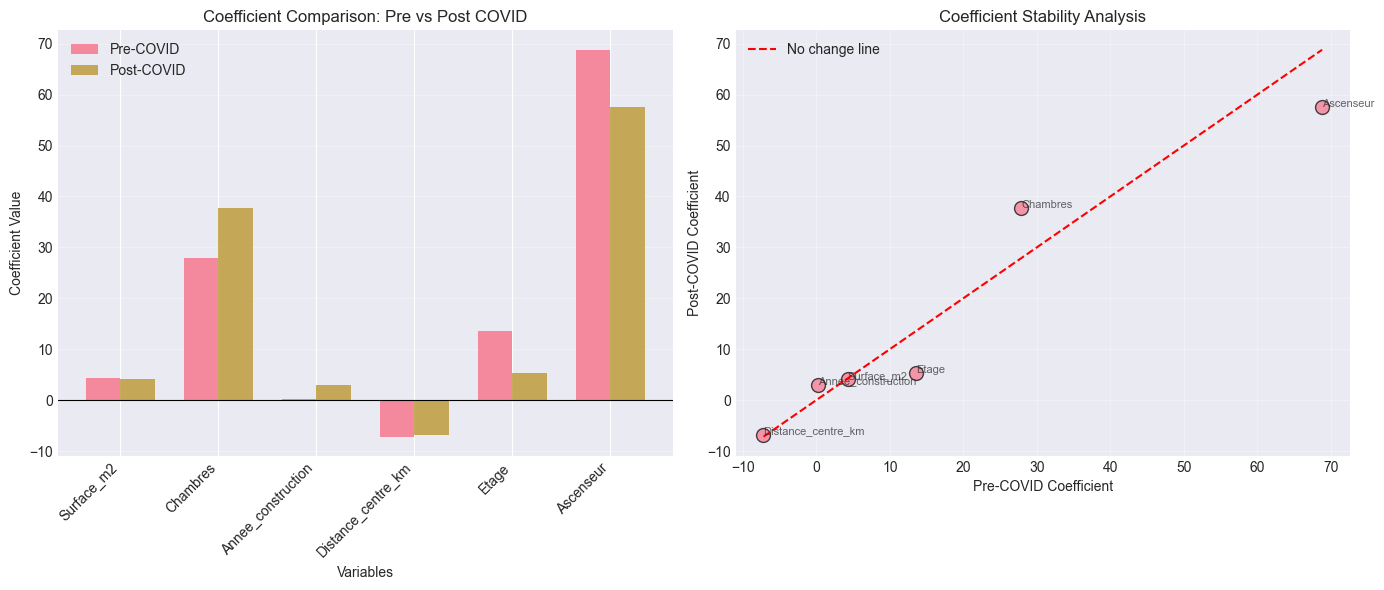

In [21]:


print("="*90)
print("CHOW TEST: Structural Break Due to COVID-19")
print("="*90)

# Define the breakpoint
covid_year = 2021
df['pre_covid'] = (df['Annee_vente'] < covid_year).astype(int)

# Split data
df_pre = df[df['Annee_vente'] < covid_year]
df_post = df[df['Annee_vente'] >= covid_year]

print(f"\nBreakpoint: {covid_year}")
print(f"Pre-COVID observations (2015-2020): {len(df_pre)}")
print(f"Post-COVID observations (2021-2023): {len(df_post)}")

# Check if we have enough observations in each period
if len(df_pre) < 20 or len(df_post) < 20:
    print("\n⚠️  Warning: Small sample size in one period. Results may be unreliable.")

# Model specification (using 6 original variables)
vars_model = ['Surface_m2', 'Chambres', 'Annee_construction', 
              'Distance_centre_km', 'Etage', 'Ascenseur']

# Estimate models for each period
X_pre = df_pre[vars_model]
y_pre = df_pre['Prix_milliers_euros']
X_post = df_post[vars_model]
y_post = df_post['Prix_milliers_euros']

model_pre = LinearRegression()
model_pre.fit(X_pre, y_pre)
y_pred_pre = model_pre.predict(X_pre)
SSR_pre = np.sum((y_pre - y_pred_pre)**2)

model_post = LinearRegression()
model_post.fit(X_post, y_post)
y_pred_post = model_post.predict(X_post)
SSR_post = np.sum((y_post - y_pred_post)**2)

# Pooled model (entire sample)
X_pooled = df[vars_model]
y_pooled = df['Prix_milliers_euros']
model_pooled = LinearRegression()
model_pooled.fit(X_pooled, y_pooled)
y_pred_pooled = model_pooled.predict(X_pooled)
SSR_pooled = np.sum((y_pooled - y_pred_pooled)**2)

# Chow test statistic
k = len(vars_model) + 1  # Parameters including intercept
n1 = len(df_pre)
n2 = len(df_post)
n = n1 + n2

SSR_unrestricted = SSR_pre + SSR_post
SSR_restricted = SSR_pooled

F_chow = ((SSR_restricted - SSR_unrestricted) / k) / (SSR_unrestricted / (n - 2*k))
p_value_chow = 1 - scipy_stats.f.cdf(F_chow, k, n - 2*k)

print("\n" + "-"*90)
print("CHOW TEST RESULTS")
print("-"*90)
print(f"SSR (Pooled model):        {SSR_pooled:,.2f}")
print(f"SSR (Pre-COVID):           {SSR_pre:,.2f}")
print(f"SSR (Post-COVID):          {SSR_post:,.2f}")
print(f"SSR (Sum of separate):     {SSR_unrestricted:,.2f}")
print(f"\nF-statistic:               {F_chow:.4f}")
print(f"p-value:                   {p_value_chow:.6f}")
print(f"Degrees of freedom:        ({k}, {n - 2*k})")

print(f"\n{'='*90}")
if p_value_chow < 0.05:
    print("CONCLUSION: REJECT H₀ - Structural break detected")
    print("The relationship between variables and price CHANGED significantly after COVID.")
else:
    print("CONCLUSION: FAIL TO REJECT H₀ - No structural break detected")
    print("The model coefficients are stable across pre/post COVID periods.")
print(f"{'='*90}")

# Compare coefficients between periods
print("\n" + "="*90)
print("COEFFICIENT COMPARISON: Pre-COVID vs Post-COVID")
print("="*90)

coef_comparison = pd.DataFrame({
    'Variable': vars_model,
    'Pre-COVID (2015-2020)': model_pre.coef_,
    'Post-COVID (2021-2023)': model_post.coef_,
    'Difference': model_post.coef_ - model_pre.coef_,
    'Change (%)': ((model_post.coef_ - model_pre.coef_) / np.abs(model_pre.coef_) * 100)
})

display(coef_comparison.round(4))

# Visualize coefficient changes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of coefficients
x_pos = np.arange(len(vars_model))
width = 0.35

axes[0].bar(x_pos - width/2, model_pre.coef_, width, label='Pre-COVID', alpha=0.8)
axes[0].bar(x_pos + width/2, model_post.coef_, width, label='Post-COVID', alpha=0.8)
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Coefficient Comparison: Pre vs Post COVID')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(vars_model, rotation=45, ha='right')
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Scatter: Pre vs Post coefficients
axes[1].scatter(model_pre.coef_, model_post.coef_, s=100, alpha=0.7, edgecolors='black')
axes[1].plot([model_pre.coef_.min(), model_pre.coef_.max()], 
             [model_pre.coef_.min(), model_pre.coef_.max()], 
             'r--', label='No change line')
for i, var in enumerate(vars_model):
    axes[1].annotate(var, (model_pre.coef_[i], model_post.coef_[i]), 
                    fontsize=8, alpha=0.7)
axes[1].set_xlabel('Pre-COVID Coefficient')
axes[1].set_ylabel('Post-COVID Coefficient')
axes[1].set_title('Coefficient Stability Analysis')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()